# Telluric Calibration Experiments

In this notebook we will explore the A0V standard stars of HPF

In [1]:
import numpy as np
import pandas as pd
import glob

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set_context('paper')

We can use [muler](http://muler.readthedocs.io/) now! :)

In [2]:
from muler.hpf import HPFSpectrum, HPFSpectrumList

In [3]:
files = glob.glob('../../data/HPF/telluric_standards/Goldilocks_*.fits')

In [4]:
len(files)

24

In [5]:
file = files[20]

In [6]:
all_orders = HPFSpectrumList.read(file)

Awesome!  Now we want a pristine A0V star model!  Let's use our brand new [gollum](https://gollum-astro.readthedocs.io/en/latest/) framework to make a model.

In [7]:
from gollum.phoenix import PHOENIXSpectrum

In [8]:
model_spec = PHOENIXSpectrum(teff=9_200, logg=4.0)\
    .rotationally_broaden(60.1)\
    .rv_shift(-20.5)\
    .instrumental_broaden(resolving_power=55_000)\
    .normalize()

(0.0, 2.0)

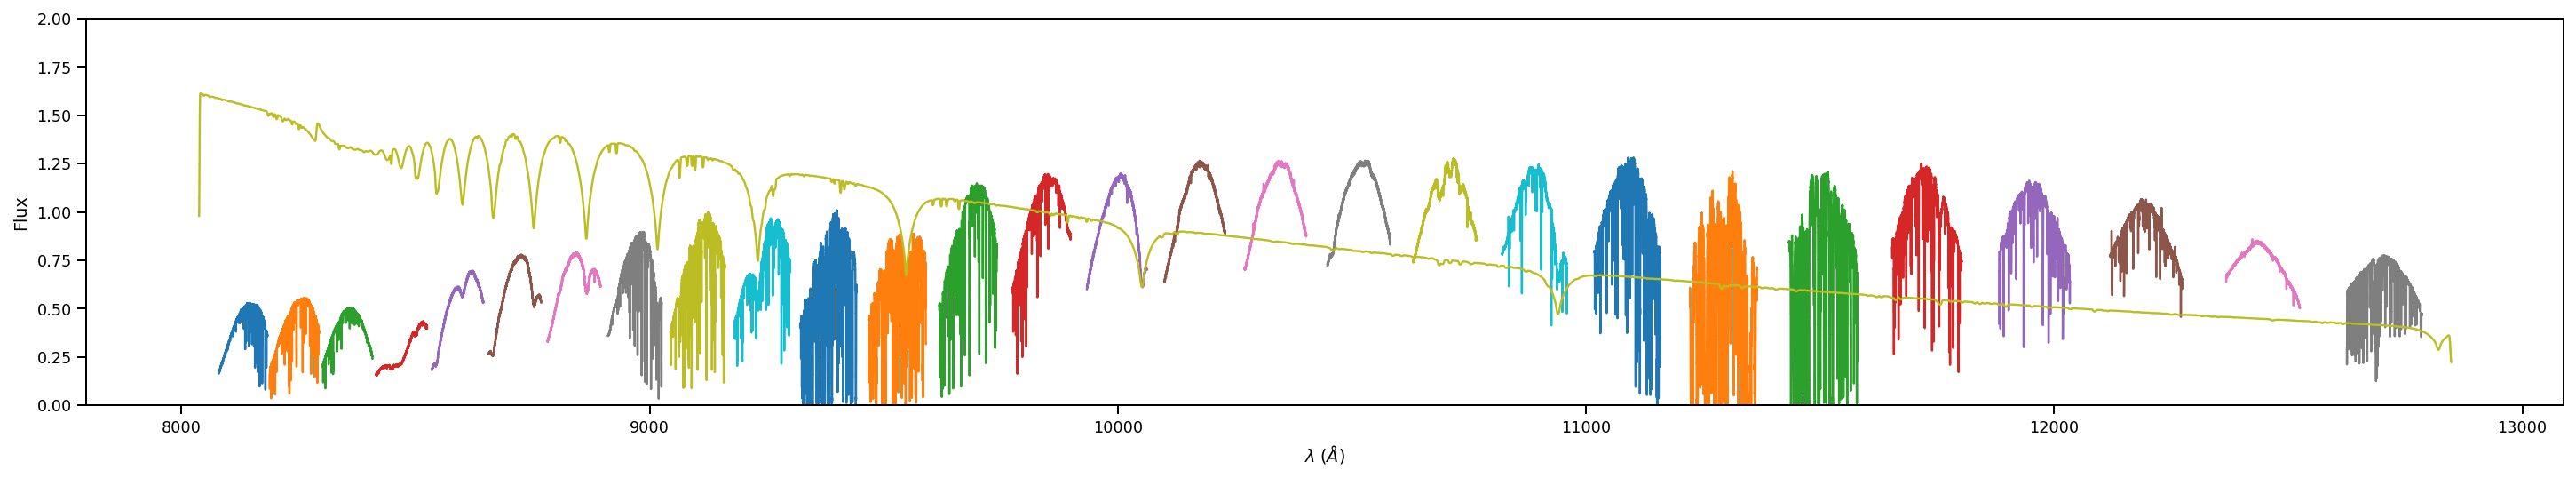

In [9]:
ax = all_orders.normalize().remove_nans().plot()
model_spec.plot(ax=ax)
ax.set_ylim(0, 2.0)

Let's pick some order that has a conspicuous Hydrogen line:

In [10]:
spec = HPFSpectrum(file=file, order=4)
spec.meta['header']['OBJECT']

'HR7102_tell_std'

In [11]:
target_spectrum = spec.sky_subtract().normalize().remove_nans()
resampled_model = model_spec.resample(target_spectrum)
ratio = target_spectrum / resampled_model

(0.0, 2.9)

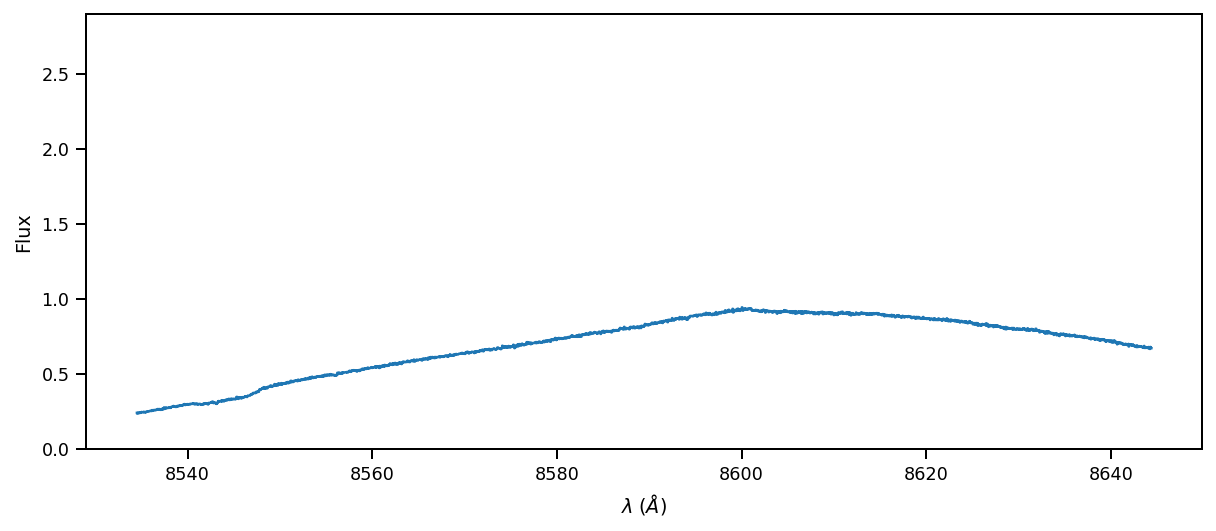

In [12]:
ax = ratio.plot()
ax.set_ylim(0, 2.9)

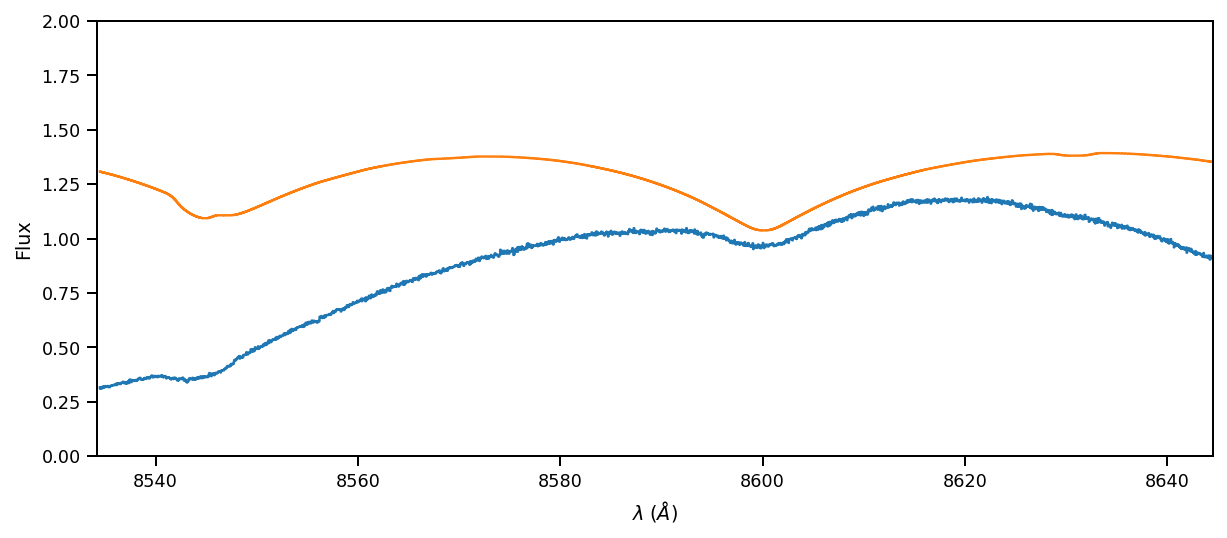

In [13]:
ax = target_spectrum.plot()
resampled_model.plot(ax=ax)
ax.set_ylim(0, 2)
ax.set_xlim(spec.wavelength.value.min(), spec.wavelength.value.max());

In [14]:
ratios = []
for order in range(0, 27+1):
    spec = HPFSpectrum(file=file, order=order)
    target_spectrum = spec.sky_subtract().normalize().remove_nans()
    resampled_model = model_spec.resample(target_spectrum)
    ratio = target_spectrum / resampled_model
    ratios.append(ratio)

In [15]:
instrumental_response = HPFSpectrumList(ratios)

(0.0, 3.0)

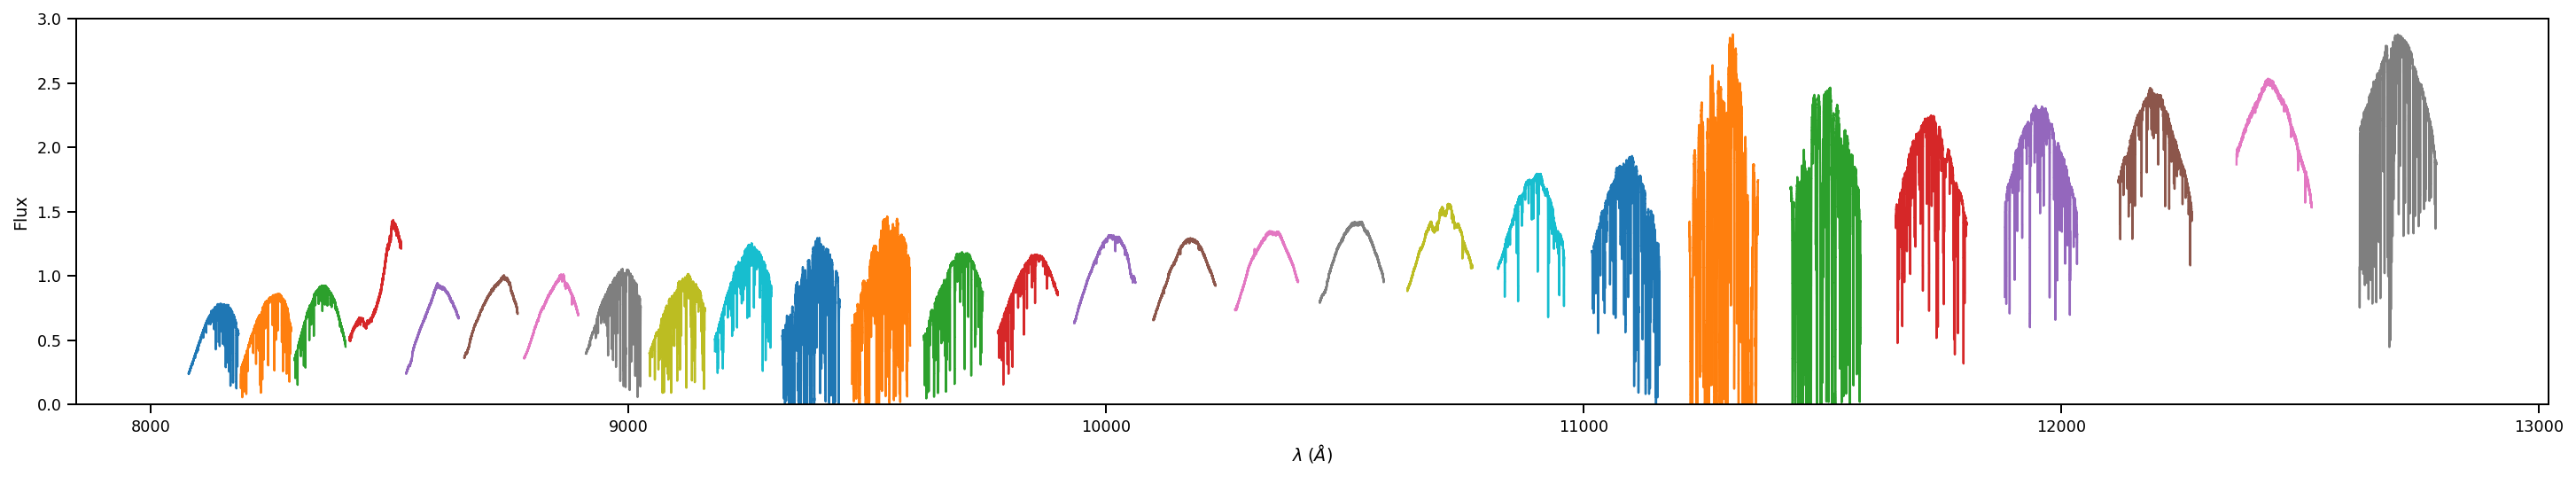

In [16]:
ax = instrumental_response.plot()
ax.set_ylim(0, 3)

Neat! We now have an instrumental response function that we can apply to correct for tellurics and blase function!